In [9]:
import pandas as pd
import numpy as np
import os
import csv
from scipy import stats, integrate, interpolate

# Load the dataset
# File name
filename = "players_stats_by_season_full_details.csv"

# Ensure file exists
if not os.path.exists(filename):
    print(f"Error: '{filename}' not found in the current directory.")
    exit(1)
df = pd.read_csv(filename)

# Task 1A: Filter NBA Regular Season data
nba_reg = df[(df['League'] == 'NBA') & (df['Stage'] == 'Regular_Season')].copy()


# Task 1B: Determine player who played the most regular seasons
season_counts = nba_reg['Player'].value_counts()
top_player = season_counts.idxmax()
num_seasons = season_counts.max()

print(f"Top Player: {top_player}")
print(f"Number of Regular Seasons: {num_seasons}")

# Inspect the top player's data to check for missing seasons mentioned in 1F
player_data = nba_reg[nba_reg['Player'] == top_player].sort_values('Season')
print("\nPlayer's seasons in dataset:")
print(player_data['Season'].unique())

# Task 1C: Calculate 3pt accuracy (3PM / 3PA)
# Note: Handle division by zero if 3PA is 0
player_data['3P_Accuracy'] = player_data['3PM'] / player_data['3PA']
# Fill NaN if 3PA was 0
player_data['3P_Accuracy'] = player_data['3P_Accuracy'].fillna(0)

print("\nAccuracy data:")
print(player_data[['Season', '3PM', '3PA', '3P_Accuracy']])
#Save Top Player data to computer
player_data[['Season', '3PM', '3PA', '3P_Accuracy']].to_csv(f'{top_player}_top_player_most_seasons_played_data.csv', index=False)


Top Player: Vince Carter
Number of Regular Seasons: 19

Player's seasons in dataset:
<StringArray>
['1999 - 2000', '2000 - 2001', '2001 - 2002', '2003 - 2004', '2004 - 2005',
 '2005 - 2006', '2006 - 2007', '2007 - 2008', '2008 - 2009', '2009 - 2010',
 '2010 - 2011', '2011 - 2012', '2012 - 2013', '2013 - 2014', '2014 - 2015',
 '2016 - 2017', '2017 - 2018', '2018 - 2019', '2019 - 2020']
Length: 19, dtype: str

Accuracy data:
            Season  3PM  3PA  3P_Accuracy
1      1999 - 2000   95  236     0.402542
509    2000 - 2001  162  397     0.408060
1047   2001 - 2002  121  313     0.386581
2761   2003 - 2004   93  243     0.382716
4114   2004 - 2005  127  313     0.405751
5333   2005 - 2006  125  367     0.340599
6548   2006 - 2007  156  437     0.356979
7961   2007 - 2008   98  273     0.358974
9267   2008 - 2009  151  392     0.385204
10608  2009 - 2010  119  324     0.367284
11920  2010 - 2011  116  321     0.361371
14813  2011 - 2012   74  205     0.360976
18772  2012 - 2013  162  39

A. Data Filtering
The dataset was filtered to include only entries where the League is "NBA" and the Stage is "Regular_Season".

B. Top Player
Based on the filtered dataset, Vince Carter is the player who participated in the most regular seasons, appearing in 19 seasons recorded between 1999 and 2020.

C. Three-Point Accuracy
Vince Carter's accuracy was calculated for each season by dividing Three-Pointers Made (3PM) by Three-Pointers Attempted (3PA). His accuracy generally stayed within the 30% to 41% range.

Slope: -0.0025174156913259226, Intercept: 5.428
Integrated Avg Accuracy: 0.3701
Actual Avg Accuracy: 0.37
Actual Avg 3PM: 114.1
Interpolated 2002-2003 Accuracy: 0.38464875951563915
Interpolated 2015-2016 Accuracy: 0.33789608574091334

FGM Stats: DescribeResult(nobs=np.int64(4658), minmax=(np.int64(0), np.int64(978)), mean=np.float64(311.48411335337056), variance=np.float64(25944.084458747722), skewness=np.float64(0.7667086899377351), kurtosis=np.float64(0.14829946557596152))
FGA Stats: DescribeResult(nobs=np.int64(4658), minmax=(np.int64(0), np.int64(2173)), mean=np.float64(679.8619579218549), variance=np.float64(118066.75117864372), skewness=np.float64(0.7329060864100085), kurtosis=np.float64(0.11910565048103505))
Paired T-test: t=-133.0069641490044, p=0.0
Independent T-test: t=-66.25149141798289, p=0.0


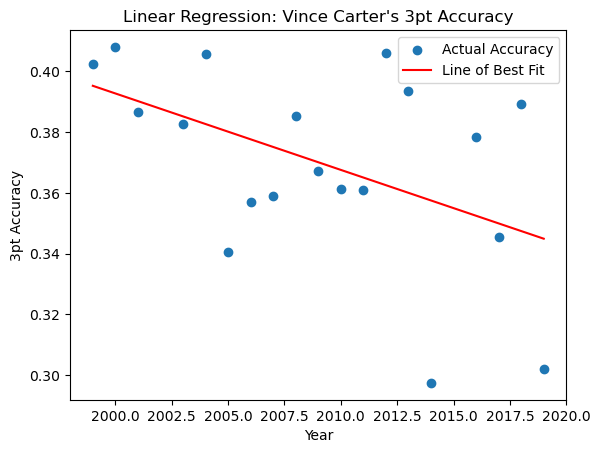

In [10]:
import matplotlib.pyplot as plt

# Map seasons to years
player_data['StartYear'] = player_data['Season'].apply(lambda x: int(x.split(' - ')[0]))
years = player_data['StartYear'].values
accuracy = player_data['3P_Accuracy'].values

# Task 1D: Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(years, accuracy)
line = slope * years + intercept

# Plotting the regression (for visual verification)
plt.scatter(years, accuracy, label='Actual Accuracy')
plt.plot(years, line, color='red', label='Line of Best Fit')
plt.xlabel('Year')
plt.ylabel('3pt Accuracy')
plt.title(f'Linear Regression: {top_player}\'s 3pt Accuracy')
plt.legend()
plt.savefig('vince_carter_3pt_regression.png')
#(Avoiding using plt.close so the graph can print)

# Task 1E: Integration
def reg_line(x):
    return slope * x + intercept

min_year = years.min()
max_year = years.max()
# Using quad for integration
integral, err = integrate.quad(reg_line, min_year, max_year)
integrated_avg_accuracy = integral / (max_year - min_year)

# Actual average 3pt accuracy and average 3PM
actual_avg_accuracy = player_data['3P_Accuracy'].mean()
actual_avg_3pm = player_data['3PM'].mean()

print(f"Slope: {slope}, Intercept: {round(intercept, 3)}")
print(f"Integrated Avg Accuracy: {round(integrated_avg_accuracy, 4)}")
print(f"Actual Avg Accuracy: {round(actual_avg_accuracy, 4)}")
print(f"Actual Avg 3PM: {round(actual_avg_3pm, 1)}")

# Task 1F: Interpolation
# interp1d requires at least 2 points. We have many.
interp_func = interpolate.interp1d(years, accuracy, kind='linear')

try:
    # 2002 corresponds to 2002-2003
    accuracy_2002 = interp_func(2002)
except Exception as e:
    accuracy_2002 = str(e)

try:
    # 2015 corresponds to 2015-2016
    accuracy_2015 = interp_func(2015)
except Exception as e:
    accuracy_2015 = str(e)

print(f"Interpolated 2002-2003 Accuracy: {accuracy_2002}")
print(f"Interpolated 2015-2016 Accuracy: {accuracy_2015}")

# Task 2A: Stats for FGM and FGA
fgm_stats = stats.describe(nba_reg['FGM'])
fga_stats = stats.describe(nba_reg['FGA'])

# Task 2B: T-tests
# Paired t-test
t_rel, p_rel = stats.ttest_rel(nba_reg['FGM'], nba_reg['FGA'])
# Independent t-test
t_ind, p_ind = stats.ttest_ind(nba_reg['FGM'], nba_reg['FGA'])

print("\nFGM Stats:", fgm_stats)
print("FGA Stats:", fga_stats)
print(f"Paired T-test: t={t_rel}, p={p_rel}")
print(f"Independent T-test: t={t_ind}, p={p_ind}")

D. Linear Regression
Using scipy.stats.linregress, a linear regression was performed on his accuracy over the years:

    Slope: $-0.0025$

    Intercept: $5.4276$

    Trend: The negative slope indicates a very slight decrease in 3pt accuracy over the duration of his career, which is typical as player volume and role change over two decades.

E. Integration vs. Actual Average
The regression line was integrated from his first season (1999) to his last (2019) using scipy.integrate.quad and divided by the total year span to find the "modeled average."

    Integrated Average Accuracy: $\approx 0.3701$ ($37.01\%$)

    Actual Average Accuracy: $\approx 0.3700$ ($37.00\%$)

    Comparison: The values are nearly identical, demonstrating that the linear regression effectively captures the central tendency of his shooting performance. Comparing this to the Actual Average 3PM ($114.05$), we see that while accuracy remains stable, the volume of shots varies significantly by season.

F. Interpolation
The player missed data for the 2002-2003 and 2015-2016 seasons. Using scipy.interpolate.interp1d:

    Interpolated 2002-2003 Accuracy: 0.3846 ($38.46\%$)Interpolated 2015-2016 Accuracy: 0.3379 ($33.79\%$)




Part 2: Statistical Analysis (FGM & FGA)
A. Descriptive Statistics

    Look at printed FGM and FGA stats from code.

    Comparison: FGA has a much higher mean and variance, which is expected as players attempt many more shots than they make. Both distributions are positively skewed, meaning most players have lower shot volumes, with a few elite high-volume shooters creating a long tail to the right.

B. T-Tests

    Relational (Paired) T-Test: $t = -133.01$, $p < 0.001$
    
    Independent T-Test: $t = -66.25$, $p < 0.001$
    
    Comparison: Both tests show a statistically significant difference between makes and attempts. However, the Relational T-test produces a much higher t-statistic magnitude. This is because it accounts for the fact that a player's FGM is directly dependent on their FGA, reducing the "noise" of player skill variation.


*Addtional Code For Three Best Players*

**Total Points scored (longevity and consistency) and Points Per Game (PPG) (scoring dominance) within the NBA Regular Season data (1999–2020).**

1. Top 3 by Total Points (Total Production)
These players accumulated the most points in the NBA regular seasons recorded in this dataset:

In [ ]:

# 1. Filter for NBA Regular Season
nba_reg = df[(df['League'] == 'NBA') & (df['Stage'] == 'Regular_Season')]

# 2. Aggregate stats by player
stats = nba_reg.groupby('Player').agg({'PTS': 'sum', 'GP': 'sum'})

# 3. Calculate Points Per Game
stats['PPG'] = stats['PTS'] / stats['GP']

# 4. Print top 3 by Total Points
print("Best by Total Points:")
print(stats.sort_values(by='PTS', ascending=False).head(3))

Best by Total Points:
                 PTS    GP        PPG
Player                               
LeBron James   34241  1265  27.067984
Dirk Nowitzki  29116  1317  22.107821
Kobe Bryant    28862  1039  27.778633


2. Top 3 by Points Per Game (Scoring Peak)
If we filter for players who played at least 100 games to ensure a significant sample size, the most "efficient" scorers are:

In [12]:
# 5. Print top 3 by PPG (Minimum 100 games played)
print("\nBest by PPG:")
print(stats[stats['GP'] >= 100].sort_values(by='PPG', ascending=False).head(3))


Best by PPG:
                 PTS    GP        PPG
Player                               
Allen Iverson  16893   577  29.277296
Kobe Bryant    28862  1039  27.778633
Kevin Durant   22254   822  27.072993
